In [1]:
import sys
import os

# Add the 'scripts' folder to the system path
script_path = os.path.abspath('../scripts')  
sys.path.append(script_path)

In [2]:
# Import custom module
from Data_preprocessing import (
    load_data,
    handle_missing_values,
    remove_duplicates,
    correct_data_types,
    merge_ip_country,
    feature_engineering,
    normalize_and_scale,
    encode_categorical_features
)

In [3]:
from eda_utils import univariate_analysis, bivariate_analysis
from sklearn.preprocessing import StandardScaler

In [4]:
# Load Data

fraud_data_path = 'C:\\Users\\HP\\OneDrive\\Desktop\\ai2\\kaim-week-08\\data\\Fraud_Data.csv'
ip_country_path = 'C:\\Users\\HP\\OneDrive\\Desktop\\ai2\\kaim-week-08\\data\\IpAddress_to_Country.csv'
credit_card_path = 'C:\\Users\\HP\\OneDrive\\Desktop\\ai2\\kaim-week-08\\data\\creditcard.csv'

In [5]:
df_fraud, df_ip_country, df_credit = load_data(
    fraud_data_path, 
    ip_country_path, 
    credit_card_path
)


In [6]:
# checking the loaded dataframe
print("Fraud Data (first 5 rows):")
display(df_fraud.head())

print("IP to Country Data (first 5 rows):")
display(df_ip_country.head())

print("Credit Card Data (first 5 rows):")
display(df_credit.head())


Fraud Data (first 5 rows):


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


IP to Country Data (first 5 rows):


,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


Credit Card Data (first 5 rows):


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
# Check missing values before handling
print("Missing values before handling:")
print(df_fraud.isnull().sum())

# Apply your missing value handling function
df_fraud = handle_missing_values(df_fraud, method='drop')

# Check missing values after handling
print("\nMissing values after handling:")
print(df_fraud.isnull().sum())


Missing values before handling:
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

Missing values after handling:
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64


In [8]:
# Check missing values before handling
print("Missing values before handling:")
print(df_credit.isnull().sum())

Missing values before handling:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [9]:
# Check missing values before handling
print("Missing values before handling:")
print(df_ip_country.isnull().sum())

Missing values before handling:
lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64


In [10]:
# Check and Remove Duplicates
# Fraud Data
print("Number of duplicate rows in df_fraud (before removal):", df_fraud.duplicated().sum())
df_fraud = remove_duplicates(df_fraud)
print("Number of duplicate rows in df_fraud (after removal):", df_fraud.duplicated().sum(), "\n")


Number of duplicate rows in df_fraud (before removal): 0
Number of duplicate rows in df_fraud (after removal): 0 



In [11]:
# IP Country Data
print("Number of duplicate rows in df_ip_country (before removal):", df_ip_country.duplicated().sum())
df_ip_country = remove_duplicates(df_ip_country)
print("Number of duplicate rows in df_ip_country (after removal):", df_ip_country.duplicated().sum(), "\n")


Number of duplicate rows in df_ip_country (before removal): 0
Number of duplicate rows in df_ip_country (after removal): 0 



In [12]:
# Credit Card Data
print("Number of duplicate rows in df_credit (before removal):", df_credit.duplicated().sum())
df_credit = remove_duplicates(df_credit)
print("Number of duplicate rows in df_credit (after removal):", df_credit.duplicated().sum(), "\n")


Number of duplicate rows in df_credit (before removal): 1081
Number of duplicate rows in df_credit (after removal): 0 



In [13]:
# Correct Data Types
# Fraud Data
print("Data types in df_fraud before correction:")
print(df_fraud.dtypes, "\n")

df_fraud = correct_data_types(
    df_fraud, 
    datetime_cols=['signup_time', 'purchase_time'], 
    numeric_cols=['age', 'purchase_value']
)
print("Data types in df_fraud after correction:")
print(df_fraud.dtypes, "\n")



Data types in df_fraud before correction:
user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
dtype: object 

Data types in df_fraud after correction:
user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address               float64
class                      int64
dtype: object 



In [14]:
# IP Country Data 
print("Data types in df_ip_country before correction:")
print(df_ip_country.dtypes, "\n")

# Used the correct_data_types function to cast the IP columns to integers.
df_ip_country = correct_data_types(
    df_ip_country,
    float_to_int_cols=['lower_bound_ip_address']
)

print("Data types in df_ip_country after correction:")
print(df_ip_country.dtypes, "\n")

Data types in df_ip_country before correction:
lower_bound_ip_address    float64
upper_bound_ip_address      int64
country                    object
dtype: object 

Data types in df_ip_country after correction:
lower_bound_ip_address     int64
upper_bound_ip_address     int64
country                   object
dtype: object 



In [15]:
# Credit Card Data
print("Data types in df_credit before correction:")
print(df_credit.dtypes, "\n")

df_credit = correct_data_types(
    df_credit,
    numeric_cols=['Time', 'Amount']
)

print("Data types in df_credit after correction:")
print(df_credit.dtypes, "\n")

Data types in df_credit before correction:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object 

Data types in df_credit after correction:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64

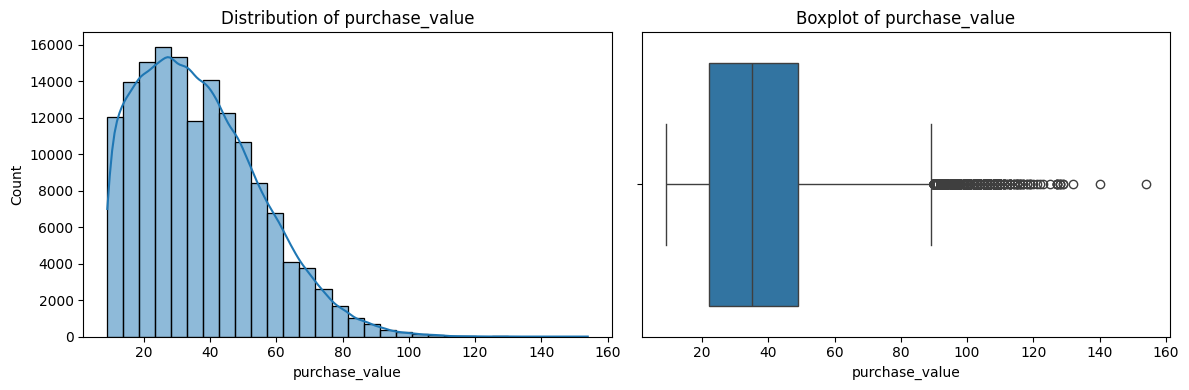

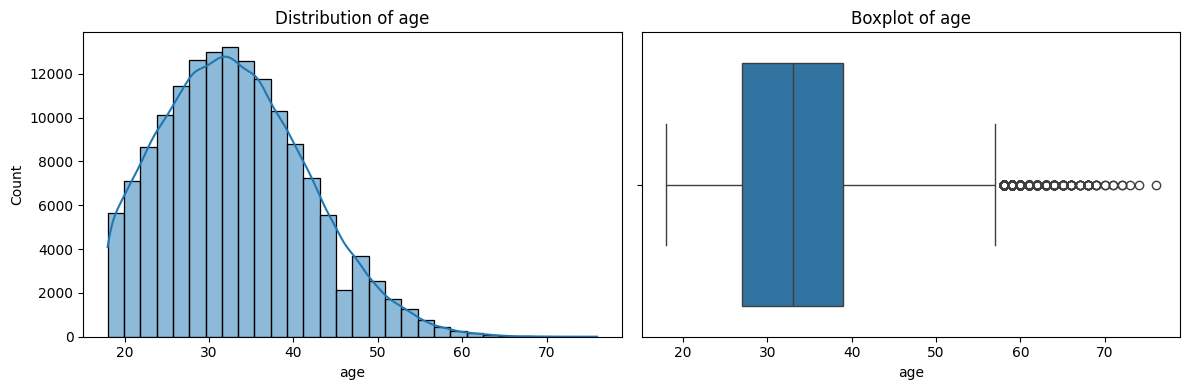

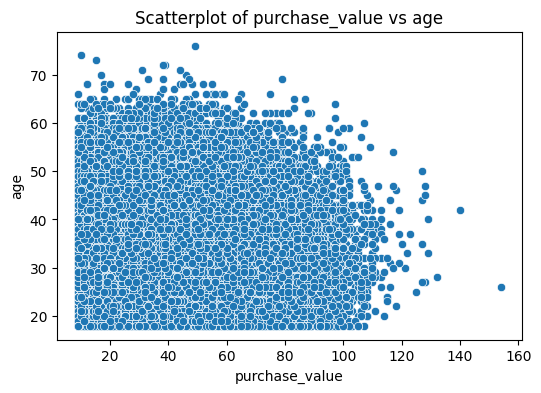

Correlation between purchase_value and age: 0.0023698179233696774


In [16]:
# Exploratory Data Analysis (EDA)

# EDA on df_fraud
univariate_analysis(df_fraud, columns=['purchase_value', 'age'])
bivariate_analysis(df_fraud, x='purchase_value', y='age')

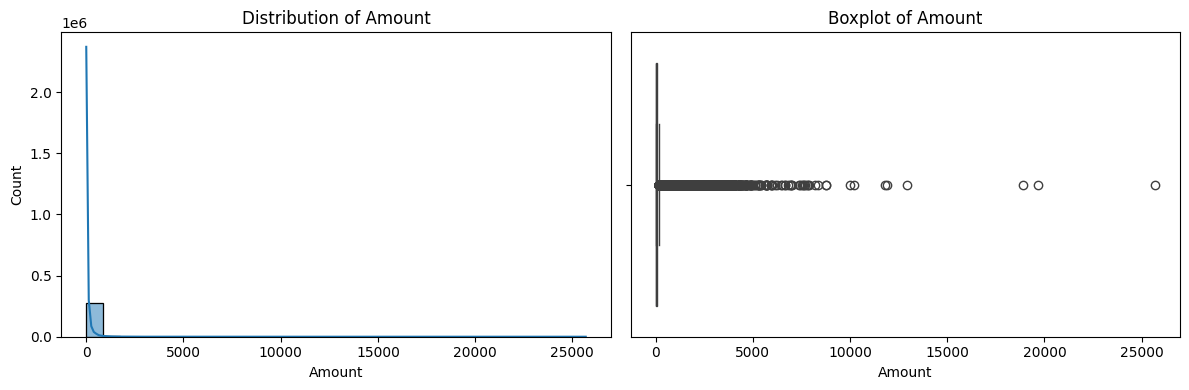

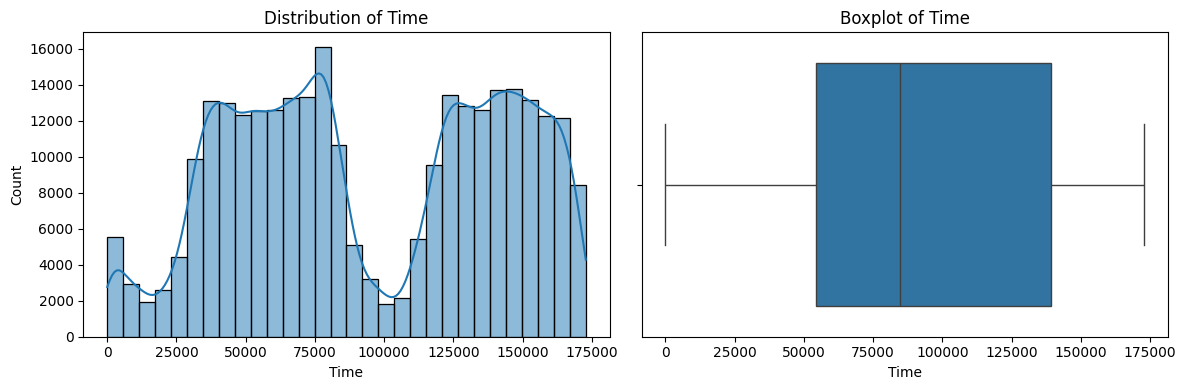

In [17]:
# Similarly for df_credit
univariate_analysis(df_credit, columns=['Amount', 'Time'])


In [18]:
#  Merge for Geolocation
df_fraud_merged = merge_ip_country(df_fraud, df_ip_country)


In [20]:
# Display the first few rows of the merged DataFrame
print(df_fraud_merged.head())

     user_id         signup_time       purchase_time  purchase_value  \
634   247547 2015-06-28 03:00:34 2015-08-09 03:57:29              47   
635   220737 2015-01-28 14:21:11 2015-02-11 20:28:28              15   
636   390400 2015-03-19 20:49:09 2015-04-11 23:41:23              44   
637    69592 2015-02-24 06:11:57 2015-05-23 16:40:14              55   
638   174987 2015-07-07 12:58:11 2015-11-03 04:04:30              51   

         device_id  source browser sex  age    ip_address  class    ip_int  \
634  KIXYSVCHIPQBR     SEO  Safari   F   30  1.677886e+07      0  16778864   
635  PKYOWQKWGJNJI     SEO  Chrome   F   34  1.684205e+07      0  16842046   
636  LVCSXLISZHVUO     Ads      IE   M   29  1.684366e+07      0  16843657   
637  UHAUHNXXUADJE  Direct  Chrome   F   30  1.693873e+07      0  16938733   
638  XPGPMOHIDRMGE     SEO  Chrome   F   37  1.697198e+07      0  16971984   

     lower_bound_ip_address  upper_bound_ip_address    country  
634              16778240.0      

In [21]:
# ---------------------------
# 6. Feature Engineering
# ---------------------------
df_fraud_merged = feature_engineering(df_fraud_merged)

In [23]:
# Check the purchase_hour, purchase_day_of_week columns and user_transaction_count column
print(df_fraud_merged.head())


     user_id         signup_time       purchase_time  purchase_value  \
634   247547 2015-06-28 03:00:34 2015-08-09 03:57:29              47   
635   220737 2015-01-28 14:21:11 2015-02-11 20:28:28              15   
636   390400 2015-03-19 20:49:09 2015-04-11 23:41:23              44   
637    69592 2015-02-24 06:11:57 2015-05-23 16:40:14              55   
638   174987 2015-07-07 12:58:11 2015-11-03 04:04:30              51   

         device_id  source browser sex  age    ip_address  class    ip_int  \
634  KIXYSVCHIPQBR     SEO  Safari   F   30  1.677886e+07      0  16778864   
635  PKYOWQKWGJNJI     SEO  Chrome   F   34  1.684205e+07      0  16842046   
636  LVCSXLISZHVUO     Ads      IE   M   29  1.684366e+07      0  16843657   
637  UHAUHNXXUADJE  Direct  Chrome   F   30  1.693873e+07      0  16938733   
638  XPGPMOHIDRMGE     SEO  Chrome   F   37  1.697198e+07      0  16971984   

     lower_bound_ip_address  upper_bound_ip_address    country  purchase_hour  \
634              